## SP500 Prediction using <font color="royalblue">Convolutional Neural Network</font>

***

#### Import Libraries and Read Dataset
- Import pandas, numpy, matplotlib, and <b>keras</b>.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

- Upload the dataset on Google Colab.<br>This step can be skipped if you're running on your computer.

In [ ]:
from google.colab import files
upload = files.upload()

Saving SP500.csv to SP500 (6).csv


- In our project, we are demonstrating a <b>time series forecasting with S&P 500 index price</b>.<br>We use the last three year's data as our input.

In [ ]:
data = pd.read_csv("SP500.csv",index_col = "DATE")
display(data)

,SP500
DATE,
2017-11-24,2602.42
2017-11-27,2601.42
2017-11-28,2627.04
2017-11-29,2626.07
2017-11-30,2647.58
...,...
2022-11-17,3946.56
2022-11-18,3965.34
2022-11-21,3949.94


***
#### Split and Reshape Data
- Using the function <b>split_sequence()</b> to split a univariate sequence data into samples.

In [ ]:
def split_sequence(sequence, steps):
    X, y = list(), list()
    for start in range (len(sequence)):
        # Define the end index of the sequence
        end_index = start + steps
        
        # Check if the end index stays in the allowable limit
        if end_index > len(sequence)-1:
            break
            
        # Extract input and output parts of the sequence
        sequence_X, sequence_y = sequence[start : end_index], sequence[end_index]
        X.append(sequence_X)
        y.append(sequence_y)
    return array(X), array(y)

- Split our dataset into multiple samples using the function above.

In [ ]:
raw_sequence = data["SP500"]
# Choose a number of time steps
# in here we choose the stock price of last 60 business days (3 months) to predict the newest days S&P500 price
steps = 60

# Split into samples
X, y = split_sequence(raw_sequence,steps)

print("-"*80)
print("The input raw sequence on which we will test our CNN model\n")
print(raw_sequence)
print("-"*80)
print("The features (X), lagged values of time series, for our CNN model\n")
print(X)
print("-"*80)
print("The respective observed values (v) of the sequence for training in CNN model\n")
print(y)

--------------------------------------------------------------------------------
The input raw sequence on which we will test our CNN model

DATE
2017-11-24    2602.42
2017-11-27    2601.42
2017-11-28    2627.04
2017-11-29    2626.07
2017-11-30    2647.58
               ...   
2022-11-17    3946.56
2022-11-18    3965.34
2022-11-21    3949.94
2022-11-22    4003.58
2022-11-23    4027.26
Name: SP500, Length: 1259, dtype: float64
--------------------------------------------------------------------------------
The features (X), lagged values of time series, for our CNN model

[[2602.42 2601.42 2627.04 ... 2732.22 2716.26 2701.33]
 [2601.42 2627.04 2626.07 ... 2716.26 2701.33 2703.96]
 [2627.04 2626.07 2647.58 ... 2701.33 2703.96 2747.3 ]
 ...
 [4057.66 4030.61 3986.16 ... 3958.79 3946.56 3965.34]
 [4030.61 3986.16 3955.   ... 3946.56 3965.34 3949.94]
 [3986.16 3955.   3966.85 ... 3965.34 3949.94 4003.58]]
--------------------------------------------------------------------------------
The r

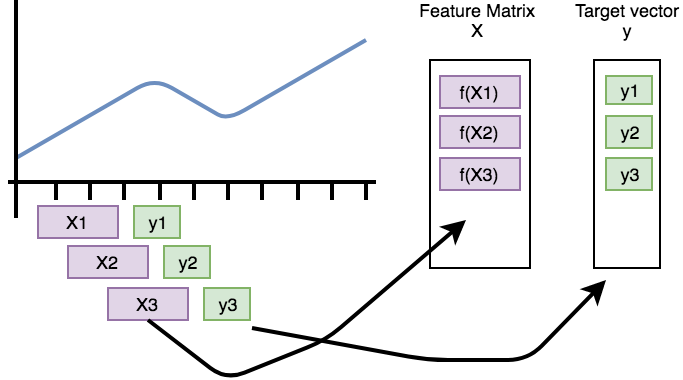

***
- Reshape 2D input data to 3D input data.

In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("-"*80)
print("After reshaping,the shape of input x")
print(X.shape)
print("-"*80)
print("The final form of input feature matrix\n")
print(X)
print("-"*80)
print ("Feature matrix X is ready for input to CNN model.\nWe have used feature engineering to convert a sequence to matrix with image matrix shape to find patterns in sequence.")

--------------------------------------------------------------------------------
After reshaping,the shape of input x
(1199, 60, 1)
--------------------------------------------------------------------------------
The final form of input feature matrix

[[[2602.42]
  [2601.42]
  [2627.04]
  ...
  [2732.22]
  [2716.26]
  [2701.33]]

 [[2601.42]
  [2627.04]
  [2626.07]
  ...
  [2716.26]
  [2701.33]
  [2703.96]]

 [[2627.04]
  [2626.07]
  [2647.58]
  ...
  [2701.33]
  [2703.96]
  [2747.3 ]]

 ...

 [[4057.66]
  [4030.61]
  [3986.16]
  ...
  [3958.79]
  [3946.56]
  [3965.34]]

 [[4030.61]
  [3986.16]
  [3955.  ]
  ...
  [3946.56]
  [3965.34]
  [3949.94]]

 [[3986.16]
  [3955.  ]
  [3966.85]
  ...
  [3965.34]
  [3949.94]
  [4003.58]]]
--------------------------------------------------------------------------------
Feature matrix X is ready for input to CNN model.
We have used feature engineering to convert a sequence to matrix with image matrix shape to find patterns in sequence.


***
#### Model
- Set up the CNN model with ReLu as the activation function.

In [ ]:
# Define model Architecture
model = Sequential()

# Use “ReLu” as activation function (Rectified Linear Unit) - a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero
# Add Conv1D as our convolutional layer since we are dealing with a one-dimensional sequence
# kernel_size defines the size of the sliding window and filter means how many different windows the model will have
model.add(Conv1D(filters = 1200, kernel_size = 60, activation = 'relu', input_shape = (steps, features))) 

# Add the MaxPooling layer and Flatten layer for pooling and flattening of the input matrix to be served as an input
model.add(MaxPooling1D(pool_size = 2))
# transforming the entire pooled feature map matrix into a single column
model.add(Flatten())

model.add(Dense (100, activation = 'relu'))
# Set one neuron for our output by adds a fully connected layer to the neural network
model.add(Dense(1)) 

# Use mean squared error as loss function with Adam (Adaptive Moment Estimator) as the optimizer in the gradient descent
model.compile(optimizer = 'adam', loss = 'mse')

- Display model summary before training

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 59, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense (Dense)               (None, 100)               185700    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 185,993
Trainable params: 185,993
Non-trainable params: 0
__________________________________________________

***
- Train/Fit the model

In [ ]:
model.fit(X, y, epochs=2000, verbose=1)
# epochs mean we pass the full dataset 2000 times to this neural network model
# verbose is just to show the iteration progress 

Epoch 1/2000
38/38 [==============================] - 2s 12ms/step - loss: 1122875.6250
Epoch 2/2000
38/38 [==============================] - 0s 12ms/step - loss: 43079.4648
Epoch 3/2000
38/38 [==============================] - 1s 14ms/step - loss: 32398.5156
Epoch 4/2000
38/38 [==============================] - 0s 13ms/step - loss: 35081.0430
Epoch 5/2000
38/38 [==============================] - 1s 14ms/step - loss: 30897.2480
Epoch 6/2000
38/38 [==============================] - 1s 14ms/step - loss: 28653.3281
Epoch 7/2000
38/38 [==============================] - 1s 13ms/step - loss: 27242.2227
Epoch 8/2000
38/38 [==============================] - 1s 14ms/step - loss: 26009.8965
Epoch 9/2000
38/38 [==============================] - 0s 13ms/step - loss: 25124.9102
Epoch 10/2000
38/38 [==============================] - 1s 17ms/step - loss: 24374.9492
Epoch 11/2000
38/38 [==============================] - 1s 16ms/step - loss: 23838.6641
Epoch 12/2000
38/38 [=============================

- Make predictions and test the model

In [ ]:
# Use the value from 61 days ago until yesterday to predict the latest date's price of S&P 500
X_input = data['SP500'].iloc[-61:-1]
X_input = X_input.values.reshape((1, steps, features))
y_pred = model.predict(X_input, verbose=0)

print("-"*50)
print("The last 61 days of S&P 500 price for the sequence {raw sequence} is")
print(X_input)
print("-"*50)
print("The actual latest value for the sequence {raw sequence} is")
print(data['SP500'].tail(1).values)
print("-"*50)
print("The next predicted value for the sequence {raw sequence} is")
print(y_pred)

--------------------------------------------------
The last 60 days of S&P 500 price for the sequence {raw sequence} is
[[[3986.16]
  [3955.  ]
  [3966.85]
  [3924.26]
  [3908.19]
  [3979.87]
  [4006.18]
  [4067.36]
  [4110.41]
  [3932.69]
  [3946.01]
  [3901.35]
  [3873.33]
  [3899.89]
  [3855.93]
  [3789.93]
  [3757.99]
  [3693.23]
  [3655.04]
  [3647.29]
  [3719.04]
  [3640.47]
  [3585.62]
  [3678.43]
  [3790.93]
  [3783.28]
  [3744.52]
  [3639.66]
  [3612.39]
  [3588.84]
  [3577.03]
  [3669.91]
  [3583.07]
  [3677.95]
  [3719.98]
  [3695.16]
  [3665.78]
  [3752.75]
  [3797.34]
  [3859.11]
  [3830.6 ]
  [3807.3 ]
  [3901.06]
  [3871.98]
  [3856.1 ]
  [3759.69]
  [3719.89]
  [3770.55]
  [3806.8 ]
  [3828.11]
  [3748.57]
  [3956.37]
  [3992.93]
  [3957.25]
  [3991.73]
  [3958.79]
  [3946.56]
  [3965.34]
  [3949.94]
  [4003.58]]]
--------------------------------------------------
The actual latest value for the sequence {raw sequence} is
[4027.26]
--------------------------------------

- Rollover our predictions

In [ ]:
X_cnn = data['SP500'].iloc[-120:-60]
X_cnn = X_cnn.values.reshape((1, steps, features))

for i in range(60):
    y_pred = model.predict(X_cnn[:,-60:], verbose=0)
    X_cnn = np.append(X_cnn,y_pred)
    X_cnn = X_cnn[-60:]
    X_cnn = X_cnn.reshape((1, steps, features))
    
display(X_cnn)

array([[[3967.4453125 ],
        [3982.20532227],
        [3972.15087891],
        [3965.24365234],
        [3960.80493164],
        [3985.65844727],
        [3972.44824219],
        [3967.89746094],
        [3911.58056641],
        [3899.96655273],
        [3876.30786133],
        [3867.15527344],
        [3858.88183594],
        [3821.77270508],
        [3834.56738281],
        [3799.12353516],
        [3779.98974609],
        [3777.74755859],
        [3705.93676758],
        [3798.60009766],
        [3693.10375977],
        [3739.8996582 ],
        [3696.15600586],
        [3707.6159668 ],
        [3641.68237305],
        [3629.6796875 ],
        [3559.06494141],
        [3540.87670898],
        [3539.97021484],
        [3603.44482422],
        [3589.20849609],
        [3616.86547852],
        [3638.84716797],
        [3636.22753906],
        [3746.32202148],
        [3698.84228516],
        [3778.30712891],
        [3725.46411133],
        [3780.70483398],
        [3754.94946289],


In [ ]:
X_past = data['SP500'].iloc[-120:-60]
X_pred = np.append(X_past,X_cnn)
X_pred.reshape((1, 120, features))
display(X_pred)

array([4121.43      , 4160.68      , 4115.77      , 4017.82      ,
       3900.86      , 3749.63      , 3735.48      , 3789.99      ,
       3666.77      , 3674.84      , 3764.79      , 3759.89      ,
       3795.73      , 3911.74      , 3900.11      , 3821.55      ,
       3818.83      , 3785.38      , 3825.33      , 3831.39      ,
       3845.08      , 3902.62      , 3899.38      , 3854.43      ,
       3818.8       , 3801.78      , 3790.38      , 3863.16      ,
       3830.85      , 3936.69      , 3959.9       , 3998.95      ,
       3961.63      , 3966.84      , 3921.05      , 4023.61      ,
       4072.43      , 4130.29      , 4118.63      , 4091.19      ,
       4155.17      , 4151.94      , 4145.19      , 4140.06      ,
       4122.47      , 4210.24      , 4207.27      , 4280.15      ,
       4297.14      , 4305.2       , 4274.04      , 4283.74      ,
       4228.48      , 4137.99      , 4128.73      , 4140.77      ,
       4199.12      , 4057.66      , 4030.61      , 3986.16   

In [ ]:
X = data['SP500'].iloc[-120:]
X = pd.concat([X, pd.DataFrame(X_pred)], axis=1)
X.loc[X.index[0:120], 'Prediction'] = X_pred
X = X.iloc[0:120]
X = X.drop(X.columns[[1]], axis=1)

# Set the date format for plotting
X = X.reset_index().rename(columns={"index":"Date"})
X.Date = X.Date.map(lambda x: x[5:])
X = X.set_index("Date")

print("Real SP500 versus Prediction")
display(X)

Real SP500 versus Prediction


,SP500,Prediction
Date,,
06-06,4121.43,4121.430000
06-07,4160.68,4160.680000
06-08,4115.77,4115.770000
06-09,4017.82,4017.820000
06-10,3900.86,3900.860000
...,...,...
11-17,3946.56,3654.916504
11-18,3965.34,3651.790283
11-21,3949.94,3646.472900


Rolling is a way to turn a single time series into multiple time series, each of them ending one time step later than the one before. By shifting a cut-out window over our sorted time series data: on each shift step I can extract the data through my cut-out window to build a new, smaller time series and extract features. Then by continue shifting a cut-out window over our data, we can create smaller time series cut-outs.

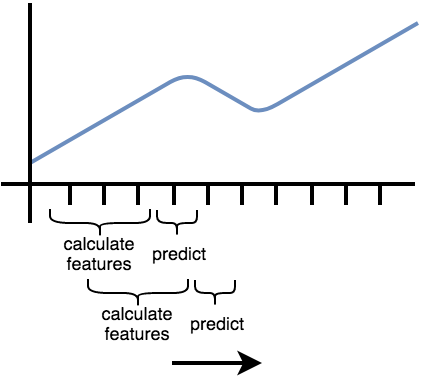

<ipython-input-14-b396f0c5fca4>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


<Figure size 432x288 with 0 Axes>

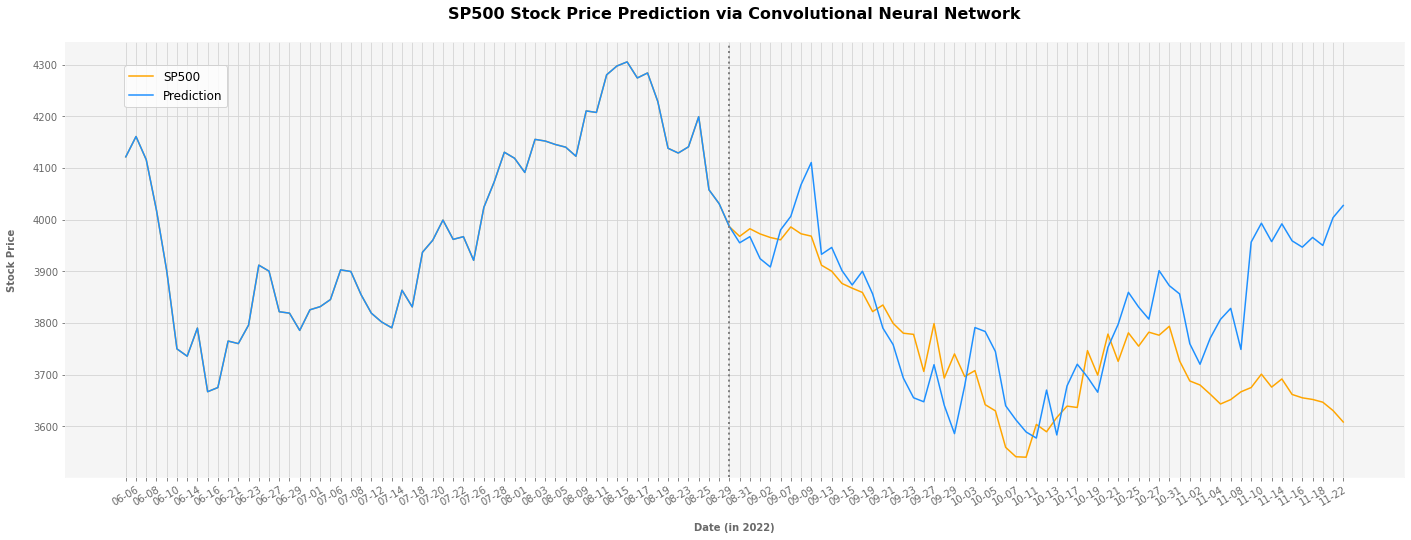

In [ ]:
plt.clf()

fig = plt.figure(figsize =(24, 8))

plt.plot(X.Prediction, color = "orange")
plt.plot(X.SP500, color = "dodgerblue")

lgd = plt.legend(["SP500","Prediction"], bbox_to_anchor=(0.04, 0.96), loc='upper left', frameon=True, facecolor = "white", fontsize = "large")
for text in lgd.get_texts():
    text.set_color("black")

ax = plt.axes()
ax.set_facecolor("whitesmoke")
ax.set_title("SP500 Stock Price Prediction via Convolutional Neural Network\n", fontsize = 16, fontweight='bold')

for i in ["bottom","top","right","left"]:
  ax.spines[i].set_color("whitesmoke")

plt.grid(color = "lightgray")

Xindex = pd.Series(X.index)
for i in range(len(Xindex)):
  if i%2 == 1:
    Xindex[i] = ""

x = np.arange(len(Xindex))
plt.xticks(x, Xindex, rotation = 30)
plt.axvline(x = "08-30", color = "gray", label = "axvline - full height", linestyle = ":", linewidth = 2)
ax.tick_params(axis='x', colors="dimgray")
ax.tick_params(axis='y', colors="dimgray")
plt.xlabel("\nDate (in 2022)", fontweight='bold', color = "dimgray")
plt.ylabel("Stock Price\n", fontweight='bold', color = "dimgray")
plt.show()